In [137]:
# QUESTIONS TO CONSIDER: 
# How many more promoters are there than detractors across our 2017 data?
# Which track boasts the best promoter-to-detractor ratio?
# What are things we could find here that could “help the business”?
# What sorts of information might be actionable?
# How can you present your findings in a way that non-technical employees can understand and use to make decisions?

In [138]:
%pylab inline
import pandas as pd 
import seaborn
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Load CSV file into memory

In [139]:
df = pd.read_csv('../datasets/Superview.csv')

In [140]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


# What sorts of information does this dataset contain?

In [141]:
# Where the students come from - top cities
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Washington DC     47
Oakland           47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [142]:
# Track students chose to do while at Summer Academy - Most popular track and least popular track 
df['Track'].value_counts()

Apps               871
Apps, Explorer     224
Games              208
VR                  60
Games, Explorer     43
Name: Track, dtype: int64

In [143]:
# How many weeks the students spent at the Academy - Max of 8 weeks.
df['Week'].value_counts()

Week 1    288
Week 2    277
Week 3    243
Week 4    193
Week 5    179
Week 6    144
Week 7    120
Week 8      9
Name: Week, dtype: int64

In [144]:
# Experience rating from students - Rages from 0 - 10
df['Rating (Num)'].value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
0            2
1            2
2            2
Name: Rating (Num), dtype: int64

In [145]:
# What the students thought of the pace of the schedule while at Academy
df['Schedule Pacing'].value_counts()

Just right           1034
A little too fast     289
A little too slow     100
Way too fast           23
Way too slow            4
Name: Schedule Pacing, dtype: int64

# Does student satisfaction vary by location?

In [146]:
# Students that gave a rating '10' from each location
df[df['Rating (Num)'] == '10']['Location'].value_counts()

San Francisco    101
New York City     84
Los Angeles       35
Santa Clara       29
Beijing           27
Tokyo             22
Chicago           17
Atlanta           14
Redwood City      12
Oakland           12
Washington DC     10
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

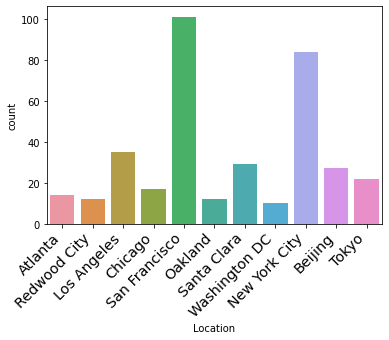

In [156]:
# plot of information from above
import seaborn as sns

sns.countplot('Location',data=df[df['Rating (Num)'] == '10'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [148]:
# Number of students who submitted a rating for each one ~ 1-10, 3 did not submit.
dict(df['Rating (Num)'].value_counts())

{'8': 392,
 '9': 384,
 '10': 376,
 '7': 177,
 '6': 59,
 '5': 35,
 '4': 13,
 '3': 8,
 '#ERROR!': 3,
 '0': 2,
 '1': 2,
 '2': 2}

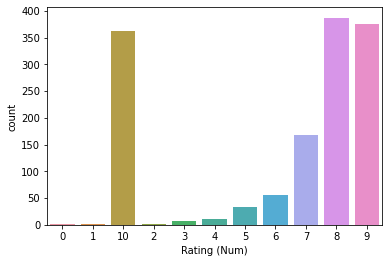

In [149]:
# Plot of count for ratings from 0 to 10 
df.dropna(inplace=True) # Gets rid of values for those who did not submit a rating
df
sns.countplot(df['Rating (Num)'])

In [480]:
# Rating per location - shows only ratings and location for each entry
RatingPerLocation = pd.DataFrame(df, columns=['Rating (Num)','Location'])

In [481]:
RatingPerLocation

,Rating (Num),Location
0,3,San Francisco
1,4,Los Angeles
2,4,San Francisco
3,4,NaN
4,4,New York City
...,...,...
1448,10,New York City
1449,8,New York City
1450,10,New York City
1451,1,New York City


In [482]:
# How many students from each location gave a rating of 0?  - No info on Location or track for 1 student.
df['Location'] = df['Location'].fillna('Location not provided')
df[df['Rating (Num)'] == '0']

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
577,608,Location not provided,NaN,Week 2,0,Way too fast
1215,1261,New York City,Apps,Week 5,0,A little too fast


In [483]:
# checking .....
df = pd.read_csv('../datasets/Superview.csv')
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


# Do international students give a higher rating for overall experience? - group locations

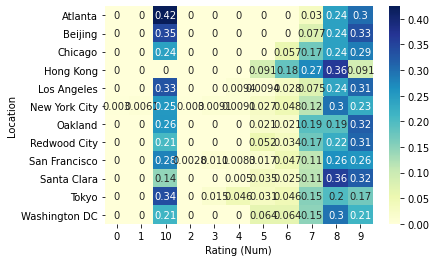

In [484]:
# df['Rating (Num)'].value_counts().plot(kind='pie')
sns.heatmap(pd.crosstab(df['Location'], df['Rating (Num)'], normalize='index'), cmap="YlGnBu", annot=True)

# What track was the most popular among international students?

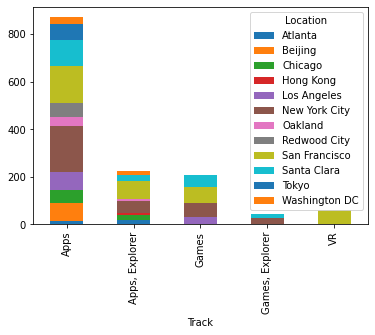

In [485]:
df.groupby(['Track'])['Location'].value_counts().unstack().plot(kind='bar', stacked=True)

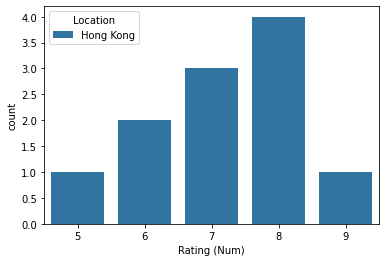

In [486]:
sns.countplot('Rating (Num)', hue='Location', data=df[(df['Location'] == 'Hong Kong')])

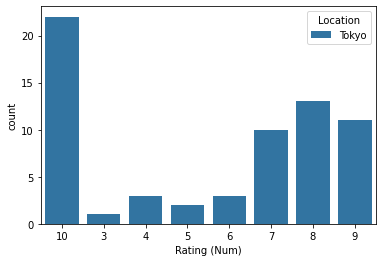

In [487]:
sns.countplot('Rating (Num)', hue='Location', data=df[(df['Location'] == 'Tokyo')])

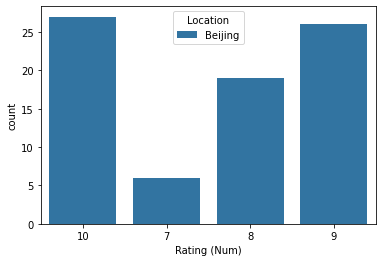

In [488]:
sns.countplot('Rating (Num)', hue='Location', data=df[(df['Location'] == 'Beijing')])

# Which track gives students the best experience?

In [489]:
# Which tracks were 'just right'?
# Which track was a 'little too slow' that might need some improvement?
pd.crosstab(df['Track'], df['Schedule Pacing'])

Schedule Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Track,,,,,
Apps,197,58,603,13,0
"Apps, Explorer",43,9,165,7,0
Games,21,25,158,1,3
"Games, Explorer",5,0,38,0,0
VR,10,5,45,0,0


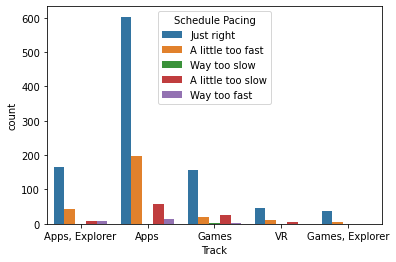

In [445]:
sns.countplot('Track', hue='Schedule Pacing', data=df)

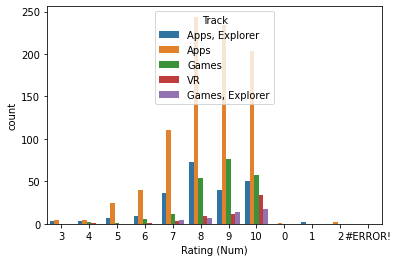

In [447]:
sns.countplot('Rating (Num)', hue='Track', data=df)

# Does the schedule pacing of the program have a big impact on the overall experience of the student? 

In [177]:
pd.crosstab(df['Week'], df['Schedule Pacing'])

Schedule Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Week,,,,,
Week 1,62,37,171,5,1
Week 2,71,27,157,5,1
Week 3,48,13,169,2,1
Week 4,30,8,148,3,0
Week 5,28,6,141,1,0
Week 6,21,2,118,2,0
Week 7,15,2,100,2,0
Week 8,1,2,5,1,0


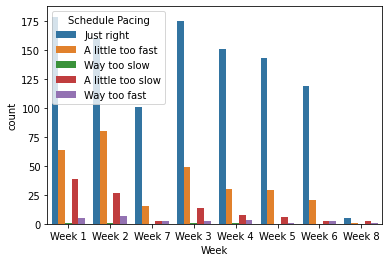

In [466]:
# Enrollment for every week and schedule pacing
sns.countplot('Week', hue='Schedule Pacing', data=df)

# Does the student experience get better the longer that they are enrolled at the Summer Academy?


In [90]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,Location not provided,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
...,...,...,...,...,...,...
1448,1495,New York City,"Apps, Explorer",Week 7,10,Just right
1449,1496,New York City,"Apps, Explorer",Week 7,8,Just right
1450,1497,New York City,Apps,Week 7,10,Just right
1451,1498,New York City,"Apps, Explorer",Week 7,1,A little too slow


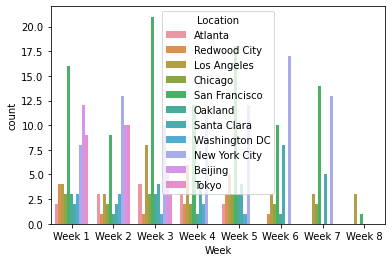

In [343]:
# students who gave a rating of 10 based on weeks spent from all locations
sns.countplot('Week', hue='Location', data=df[(df['Rating (Num)'] == '10')])

# Which track kept the students enrolled at the academy the longest?

In [82]:
# There are 5 tracks in the program with the most popular one being 'Apps'
df['Track'].describe()

count     1406
unique       5
top       Apps
freq       871
Name: Track, dtype: object

In [83]:
# 5 tracks in program
df['Track'].nunique()

5

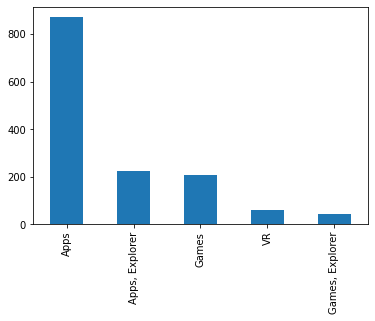

In [84]:
# plot showing enrolled student count for each offered track at academy 
df['Track'].value_counts().plot(kind='bar')

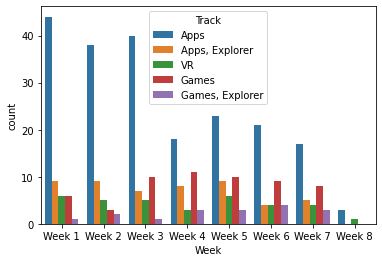

In [367]:
# Plot for chosen track for every week of program
sns.countplot('Week', hue='Track', data=df[(df['Rating (Num)'] == '10')])

# Does the location of where they are coming from influence how long the stay at the program? 

In [368]:
# Location count, unique locations, top location - SF
df['Location'].describe()

count              1406
unique               12
top       San Francisco
freq                360
Name: Location, dtype: object

In [375]:
# 12 unique locations of where students are coming from
df['Location'].nunique()

12

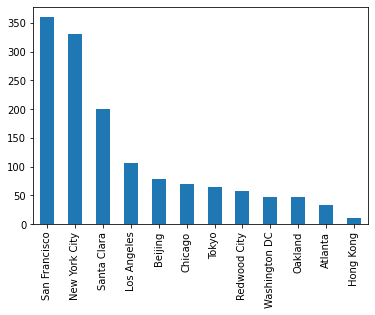

In [377]:
# Plot of student count per location
df['Location'].value_counts().plot(kind='bar')

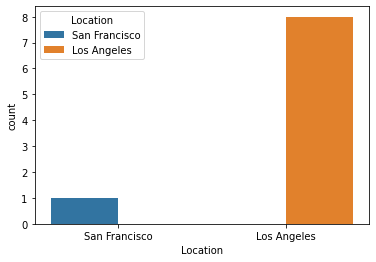

In [382]:
sns.countplot('Location', hue='Location', data=df[(df['Week'] == 'Week 8')])

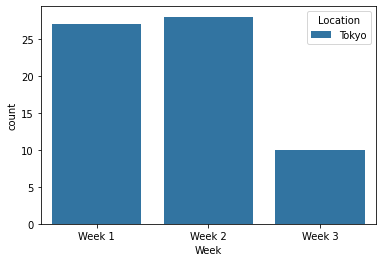

In [383]:
# Tokyo students enrolled week 1,week 2, and week 3
sns.countplot('Week', hue='Location', data=df[(df['Location'] == 'Tokyo')])

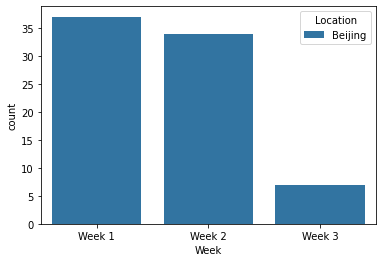

In [384]:
# Hong Kong students enrolled week 1, week 2, and week 3
sns.countplot('Week', hue='Location', data=df[(df['Location'] == 'Beijing')])

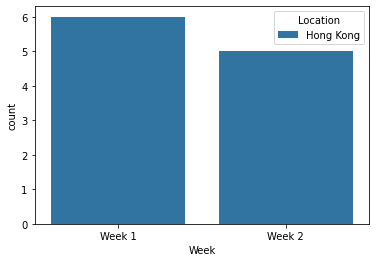

In [385]:
# Hong Kong students enrolled week 1 and week 2
sns.countplot('Week', hue='Location', data=df[(df['Location'] == 'Hong Kong')])